<a href="https://colab.research.google.com/github/valdenio458/python-analise-de-dados-data-viking/blob/main/aula_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Histograma e boxplot

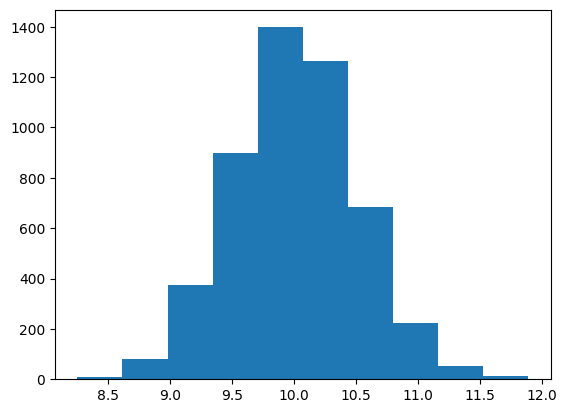

In [4]:
data = np.random.normal(10, 0.5, 5000)
plt.hist(data)
plt.show()

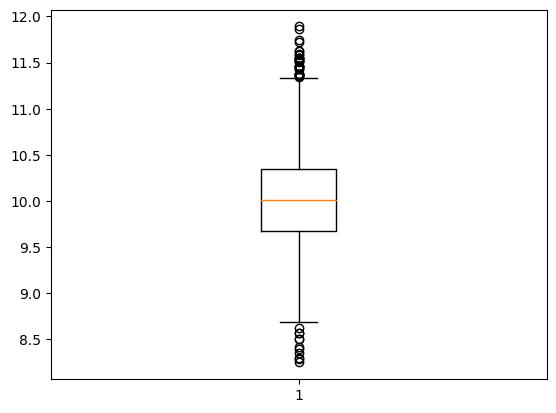

In [6]:
plt.boxplot(data)
plt.show()

### Scatter plot

In [17]:
x = np.random.normal(10, 0.5, 100)
y = np.random.uniform(0, 20, 100)

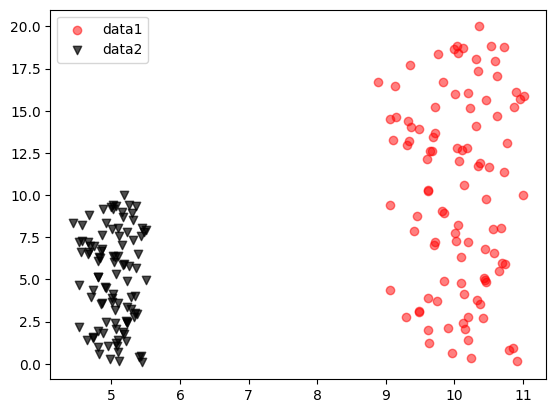

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y, marker='o', color='red', label='data1', alpha=0.5)
ax.scatter(x*0.5, y*0.5, marker='v', color='black', label='data2', alpha=0.7)
ax.legend(loc='best')

### Dados econômicos

In [18]:
import plotly.express as px

In [45]:
px.data.gapminder()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [24]:
df = px.data.gapminder().query('country == "Brazil"').set_index('year')

In [25]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


Text(0, 0.5, 'Tempo')

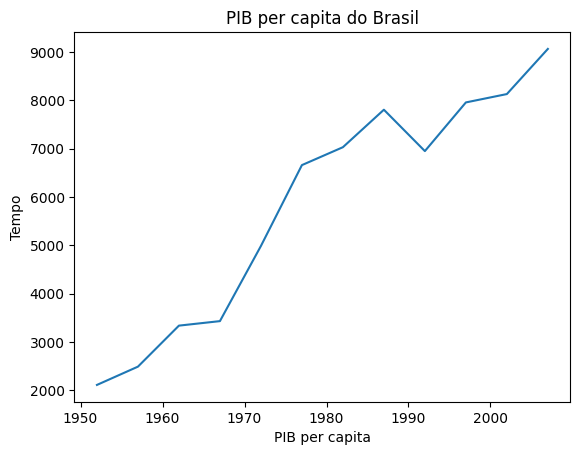

In [26]:
plt.plot(df.index, df['gdpPercap'])
plt.title('PIB per capita do Brasil')
plt.xlabel('PIB per capita')
plt.ylabel('Tempo')

<ipython-input-29-27801bc57cb4>:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



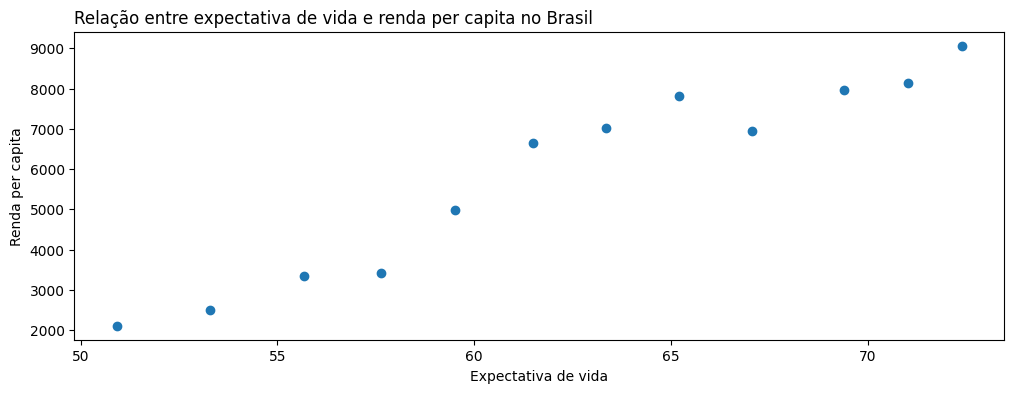

In [29]:
title = 'Relação entre expectativa de vida e renda per capita no Brasil'

plt.figure(figsize=(12, 4))
plt.scatter(df['lifeExp'], df['gdpPercap'], cmap='viridis')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')
plt.title(title, loc='left')
plt.show()

Text(0.5, 1.0, 'População brasileira')

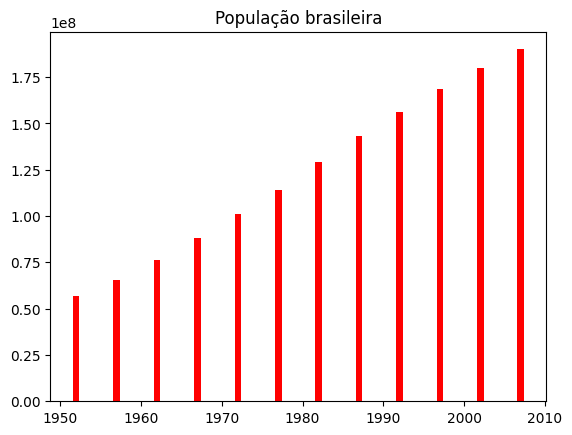

In [30]:
plt.bar(x=df.index,
        height=df['pop'],
        color='red')
plt.title('População brasileira')

In [31]:
def filtrar_continente(continente):
  df = px.data.gapminder()
  df = df[df['continent'] == continente]
  return df

In [36]:
def filtrar_pais(pais, variavel):
  'Filtra algum país da amostra para as variáveis "pop", "gdoPercap" e "lifeExp"'
  df = px.data.gapminder()
  df = df[df['country'] == pais][variavel]
  return df

Text(0, 0.5, 'Renda per capita')

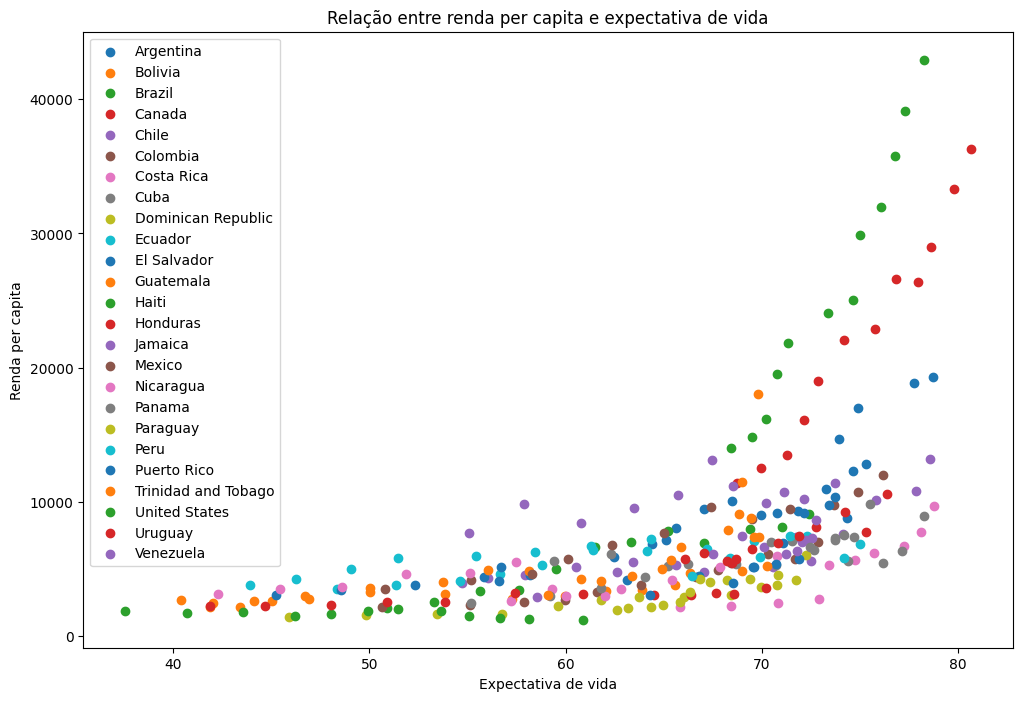

In [43]:
americas = filtrar_continente('Americas')
paises = americas['country'].unique()
plt.figure(figsize=(12, 8))
for pais in paises:
  plt.scatter(filtrar_pais(pais = pais,
              variavel = 'lifeExp'
              ),
              filtrar_pais(pais = pais,
              variavel = 'gdpPercap'))
plt.legend(labels=paises, loc='best')
plt.title('Relação entre renda per capita e expectativa de vida')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')